In [1]:
import pandas as pd
import stumpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

In [2]:
steam_df = pd.read_csv(".//steamgen.csv")
steam_df.head()

,drum pressure,excess oxygen,water level,steam flow
0,320.08239,2.506774,0.032701,9.302970
1,321.71099,2.545908,0.284799,9.662621
2,320.91331,2.360562,0.203652,10.990955
3,325.00252,0.027054,0.326187,12.430107
4,326.65276,0.285649,0.753776,13.681666


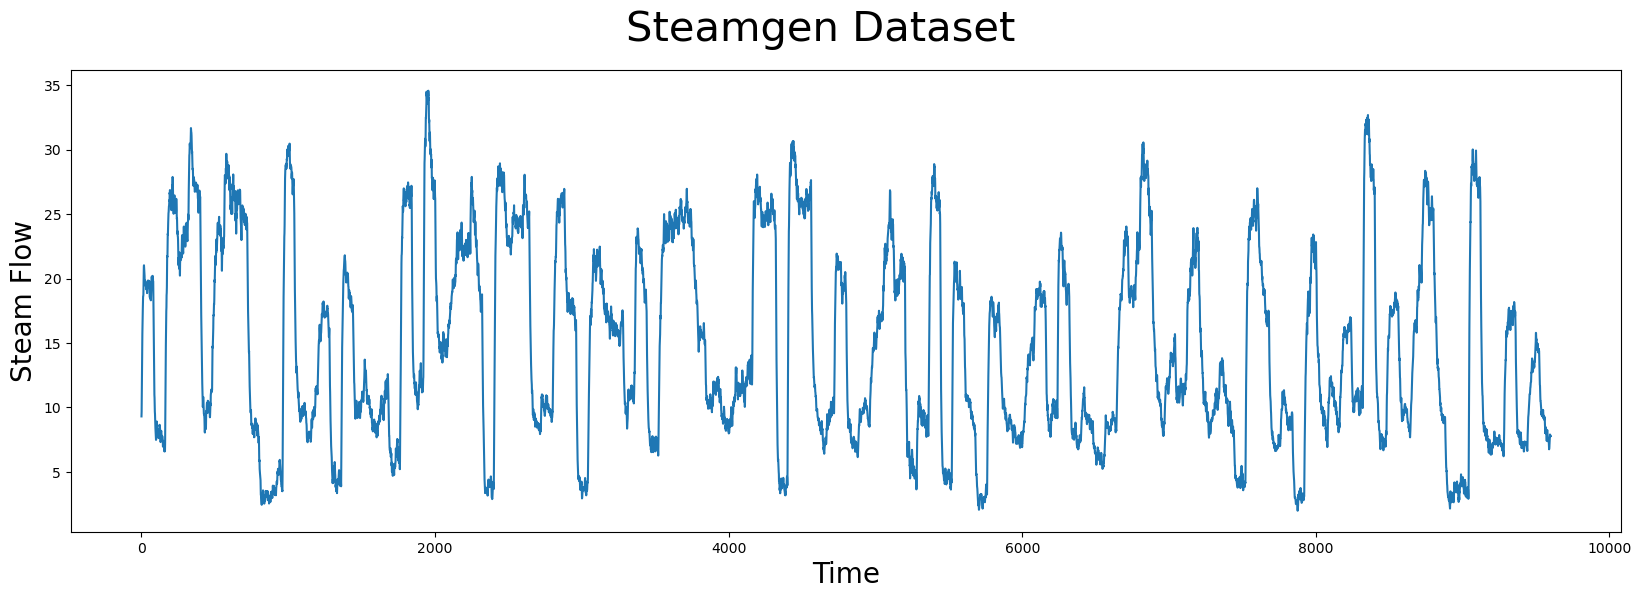

In [3]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
plt.suptitle('Steamgen Dataset', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('Steam Flow', fontsize='20')
plt.plot(steam_df['steam flow'].values)
plt.show()


In [4]:
import numpy as np
import scipy.signal

from matplotlib import pyplot as plt
L=steam_df['steam flow'].values
L2=L
#L *= scipy.signal.windows.hann(len(L))

L = np.round(L, 1)
# Remove DC component
L -= np.mean(L)
# Window signal
L *= scipy.signal.windows.hann(len(L))

fft = np.fft.rfft(L, norm="ortho")

#plt.plot(L)
#plt.figure()
#plt.plot(abs(fft))
def abs2(x):
    return x.real**2 + x.imag**2

selfconvol=np.fft.irfft(abs2(fft), norm="ortho")


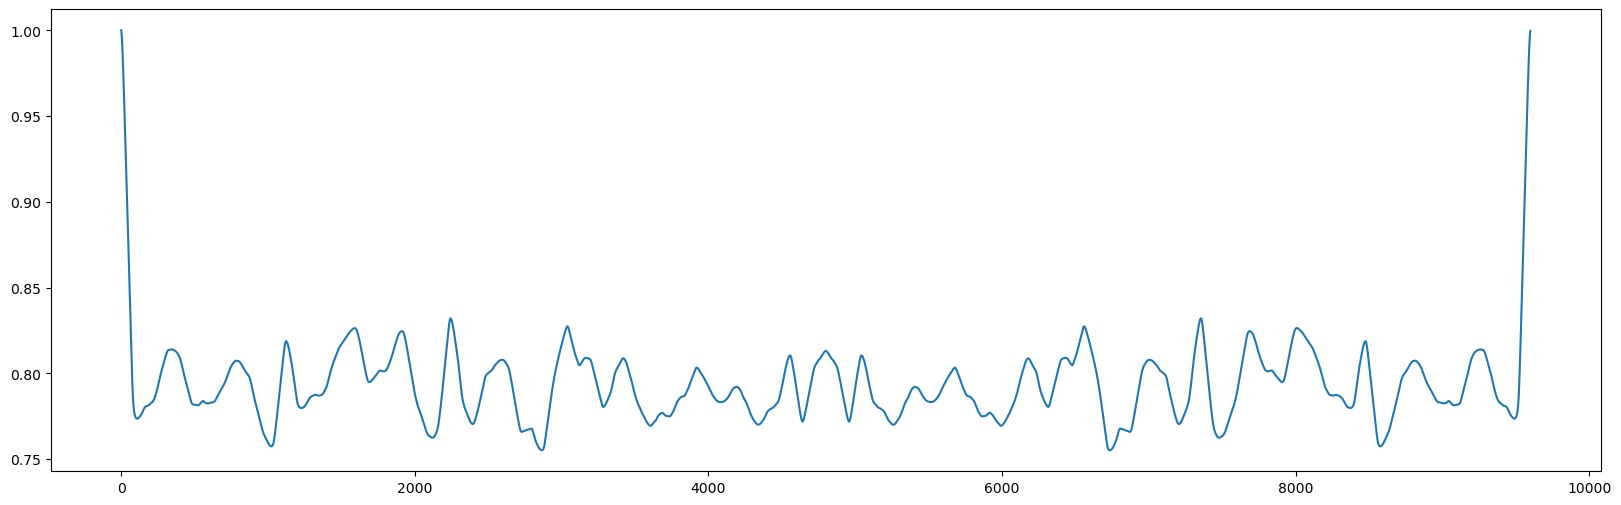

The period is  299


In [5]:
Ltrunk=1
multipleofperiod= np.argsort(selfconvol[1:len(L2)//4])
Ltrunk=L2[0:(len(L2//len(multipleofperiod))*len(multipleofperiod))]

fft = np.fft.rfft(Ltrunk, norm="ortho")
selfconvol=np.fft.irfft(abs2(fft), norm="ortho")
selfconvol=selfconvol/selfconvol[0]

plt.figure()
plt.plot(selfconvol)
plt.savefig('second.jpg')
plt.show()


#get ranges for first min, second max
fmax=np.max(selfconvol[1:len(Ltrunk)//4])
fmin=np.min(selfconvol[1:len(Ltrunk)//4])
xstartmin=1
while selfconvol[xstartmin]>fmin+0.1*(fmax-fmin) and xstartmin< len(Ltrunk)//4:
    xstartmin=xstartmin+1
    
xstartmax=xstartmin
while selfconvol[xstartmax]<fmin+0.1*(fmax-fmin) and xstartmax< len(Ltrunk)//4:
    xstartmax=xstartmax+1
    




period=np.argmax(selfconvol[xstartmin:xstartmax])+xstartmax

print ("The period is ",period)


In [6]:
m = 640
mp = stumpy.stump(steam_df['steam flow'], m)


In [7]:
motif_idx = np.argsort(mp[:, 0])[0]

print(f"The motif is located at index {motif_idx}")

The motif is located at index 643


In [8]:
nearest_neighbor_idx = mp[motif_idx, 1]

print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")

The nearest neighbor is located at index 8724


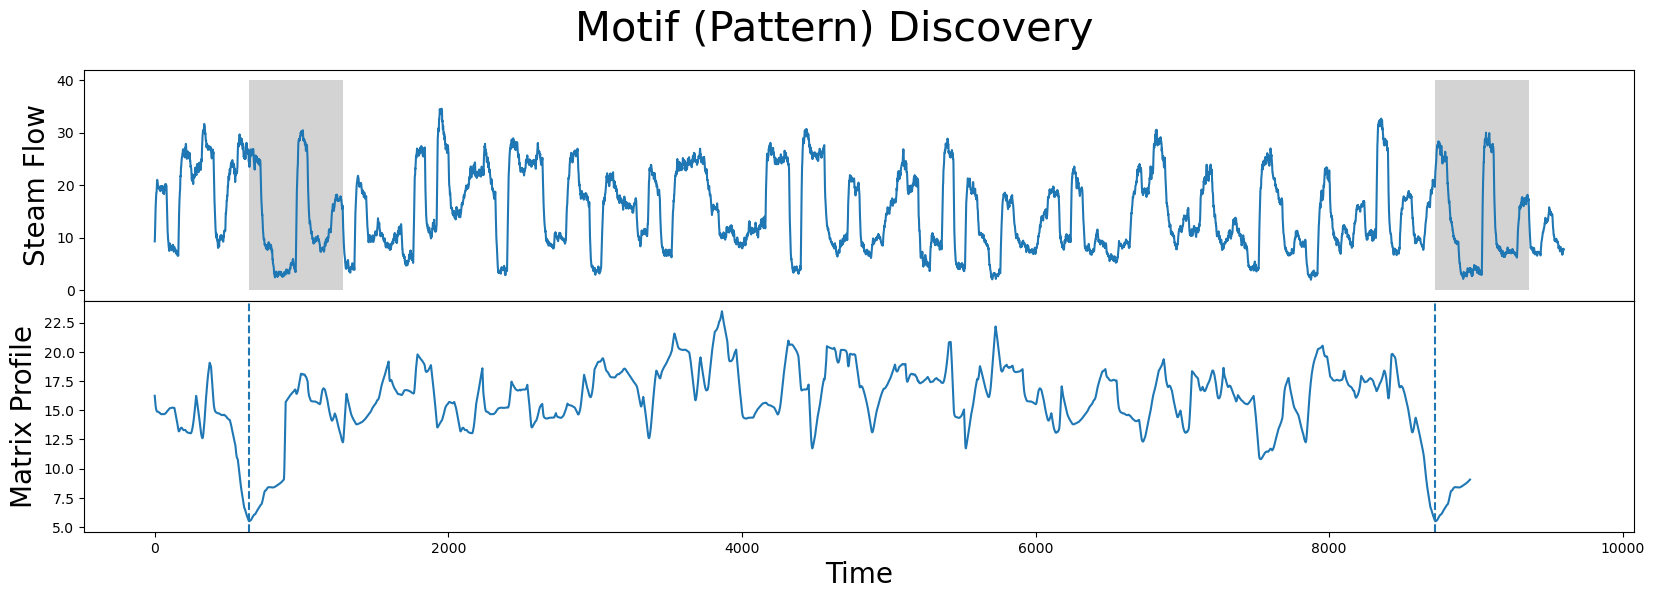

In [9]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')

axs[0].plot(steam_df['steam flow'].values)
axs[0].set_ylabel('Steam Flow', fontsize='20')
rect = Rectangle((motif_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((nearest_neighbor_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=motif_idx, linestyle="dashed")
axs[1].axvline(x=nearest_neighbor_idx, linestyle="dashed")
axs[1].plot(mp[:, 0])
plt.show()


In [10]:
#discord = np.argsort(mp[:, 0])[0]
discord_idx = np.argsort(mp[:, 0])[-1]
#print(f"The discord is located at index {discord}")
print(f"The discord is located at index {discord_idx}")

The discord is located at index 3864


In [11]:
nearest_neighbor_distance = mp[discord_idx, 0]

print(f"The nearest neighbor subsequence to this discord is {nearest_neighbor_distance} units away")
#print(f"The discord  subsequence to this discord is {discord_idx} units away")

The nearest neighbor subsequence to this discord is 23.47616836730197 units away


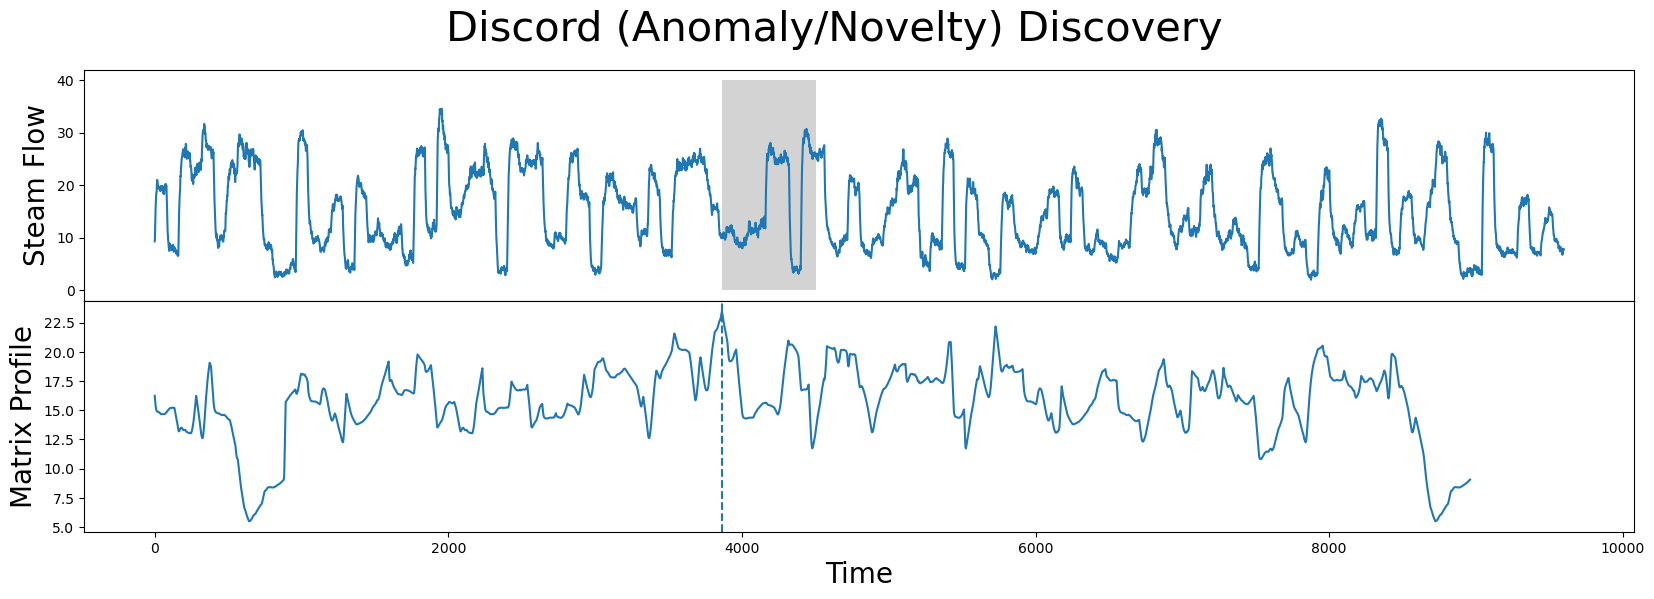

In [12]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Discord (Anomaly/Novelty) Discovery', fontsize='30')

axs[0].plot(steam_df['steam flow'].values)
axs[0].set_ylabel('Steam Flow', fontsize='20')
rect = Rectangle((discord_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=discord_idx, linestyle="dashed")
axs[1].plot(mp[:, 0])
plt.show()

In [13]:


steam_df2 = pd.read_csv(".//steamgen3.csv",sep=';')
steam_df2.head()

,drum pressure,excess oxygen,water level,steam flow
0,320.08239,2.506774,0.032701,9.302970
1,321.71099,2.545908,0.284799,9.662621
2,320.91331,2.360562,0.203652,10.990955
3,325.00252,0.027054,0.326187,12.430107
4,326.65276,0.285649,0.753776,13.681666


In [14]:
from itertools import groupby
from operator import itemgetter
xd=(np.where(steam_df2["steam flow"].isna()) )
xd=np.array(xd).tolist()
n=0
groups = []
for k, g in groupby(enumerate(xd.pop(0)), lambda x: x[0]-x[1]):
     
     groups.append(list(map(itemgetter(1), g)))
     print(len(groups[n]),groups[n])
     n=n+1


33 [258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290]
130 [3987, 3988, 3989, 3990, 3991, 3992, 3993, 3994, 3995, 3996, 3997, 3998, 3999, 4000, 4001, 4002, 4003, 4004, 4005, 4006, 4007, 4008, 4009, 4010, 4011, 4012, 4013, 4014, 4015, 4016, 4017, 4018, 4019, 4020, 4021, 4022, 4023, 4024, 4025, 4026, 4027, 4028, 4029, 4030, 4031, 4032, 4033, 4034, 4035, 4036, 4037, 4038, 4039, 4040, 4041, 4042, 4043, 4044, 4045, 4046, 4047, 4048, 4049, 4050, 4051, 4052, 4053, 4054, 4055, 4056, 4057, 4058, 4059, 4060, 4061, 4062, 4063, 4064, 4065, 4066, 4067, 4068, 4069, 4070, 4071, 4072, 4073, 4074, 4075, 4076, 4077, 4078, 4079, 4080, 4081, 4082, 4083, 4084, 4085, 4086, 4087, 4088, 4089, 4090, 4091, 4092, 4093, 4094, 4095, 4096, 4097, 4098, 4099, 4100, 4101, 4102, 4103, 4104, 4105, 4106, 4107, 4108, 4109, 4110, 4111, 4112, 4113, 4114, 4115, 4116]
71 [8578, 8579, 8580, 8581, 8582, 8583, 8584, 

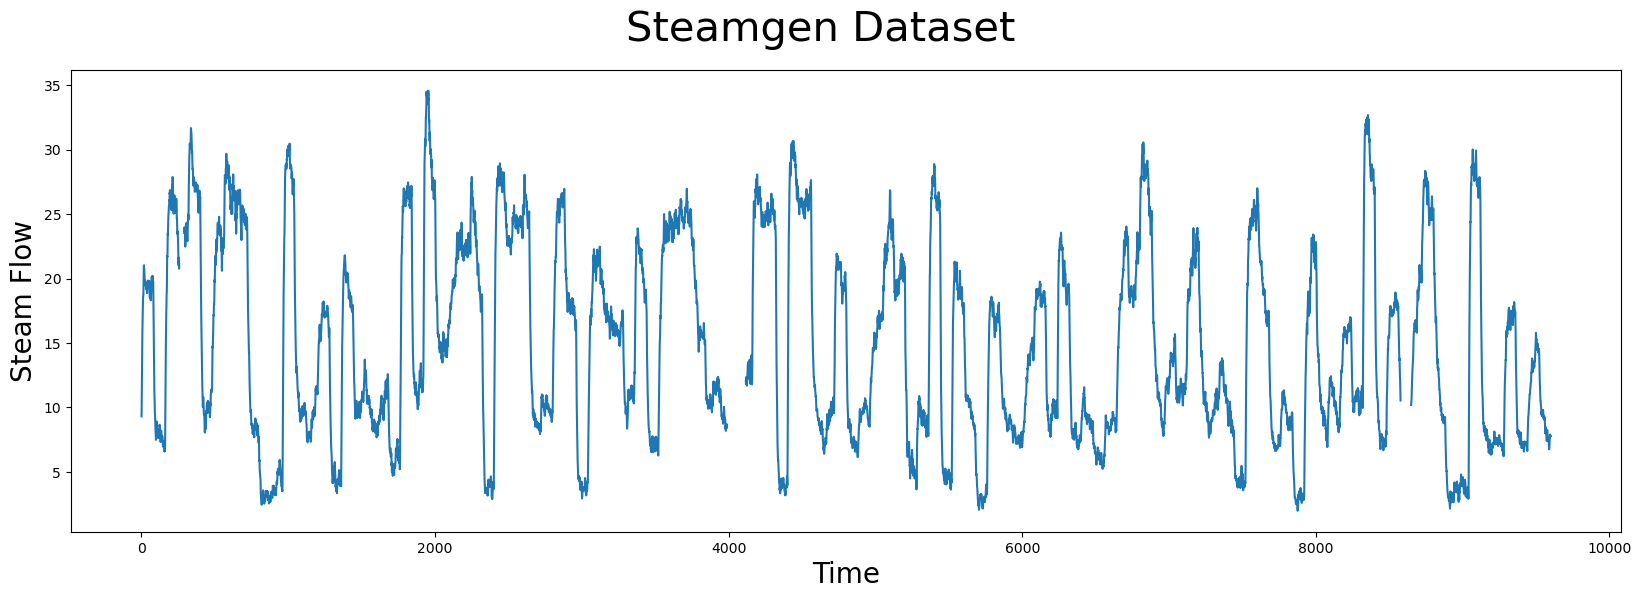

In [15]:
plt=reload(plt)
plt.suptitle('Steamgen Dataset', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('Steam Flow', fontsize='20')
plt.plot(steam_df2['steam flow'].values)
plt.show()


In [16]:
steam_df2.interpolate(method='linear', limit_direction='forward', axis=0)

,drum pressure,excess oxygen,water level,steam flow
0,320.08239,2.506774,0.032701,9.302970
1,321.71099,2.545908,0.284799,9.662621
2,320.91331,2.360562,0.203652,10.990955
3,325.00252,0.027054,0.326187,12.430107
4,326.65276,0.285649,0.753776,13.681666
...,...,...,...,...
9595,247.41260,0.022345,-1.993993,7.898815
9596,245.71311,1.483497,-2.124374,7.729076
9597,247.18731,0.016897,-1.606152,7.856854
9598,247.95637,0.477808,-1.813088,7.799764


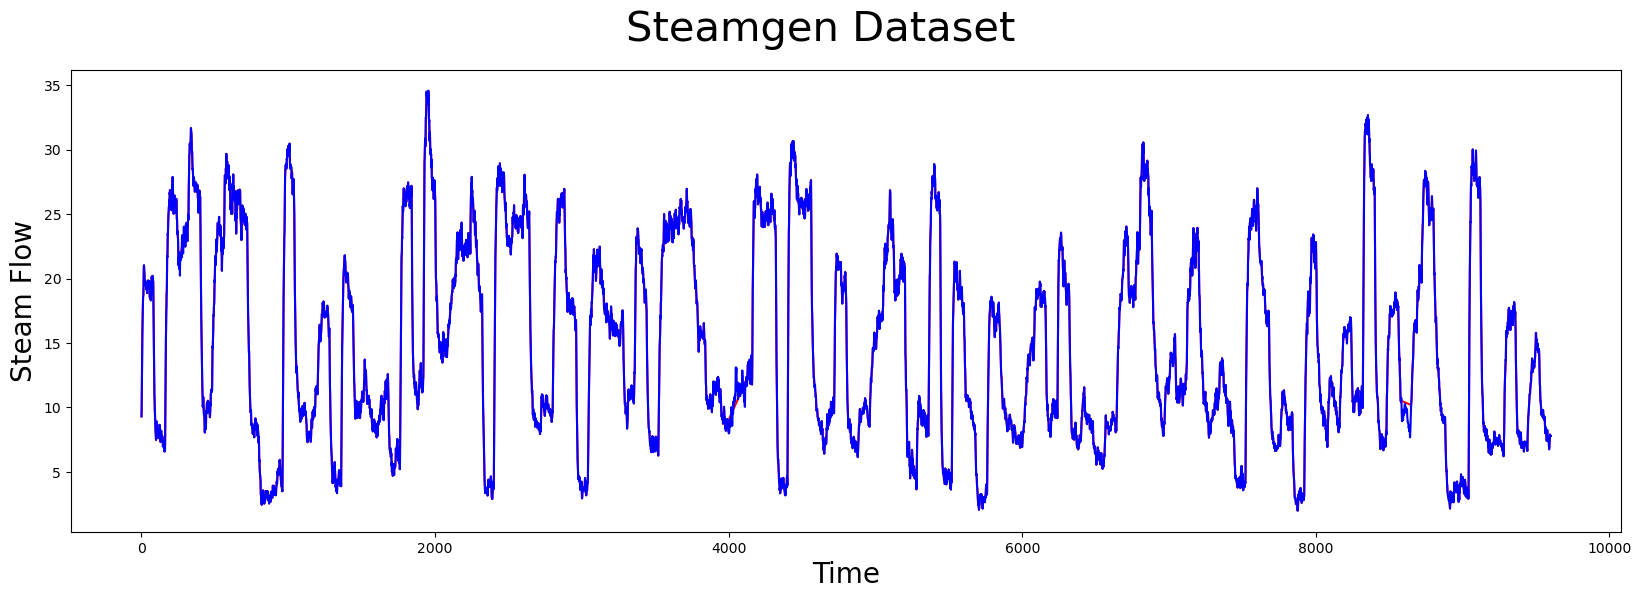

In [17]:
plt=reload(plt)
plt.suptitle('Steamgen Dataset', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('Steam Flow', fontsize='20')


plt.plot(steam_df2['steam flow'].interpolate(method='linear', limit_direction='forward', axis=0),'r-')
plt.plot(steam_df['steam flow'].values,'b')
plt.show()


In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt
stm=steam_df2['steam flow'].interpolate(method='linear', limit_direction='forward', axis=0)
#calculate RMSE
sqrt(mean_squared_error(steam_df['steam flow'][3987:4116].values, stm[3987:4116].values, squared=True)/100)
#from sklearn.metrics import mean_squared_error
#rmse = mean_squared_error(steam_df['steam flow'][3987:4116].values, steam_df2['steam flow'][3987:4116].values , squared=False)
#print(rmse)

0.09000112137635118

In [19]:
from sklearn.metrics import mean_absolute_error as mae
  

error = mae(steam_df['steam flow'][3987:4116].values, stm[3987:4116].values)
  
# display
print("Mean absolute error : " + str(error))

Mean absolute error : 0.6731005472217291


In [20]:
tau, p_value=(scipy.stats.kendalltau(steam_df['steam flow'][3987:4116].values, stm[3987:4116].values)
  )
print(tau,p_value)

0.5402131782945736 1.0841753063146748e-19


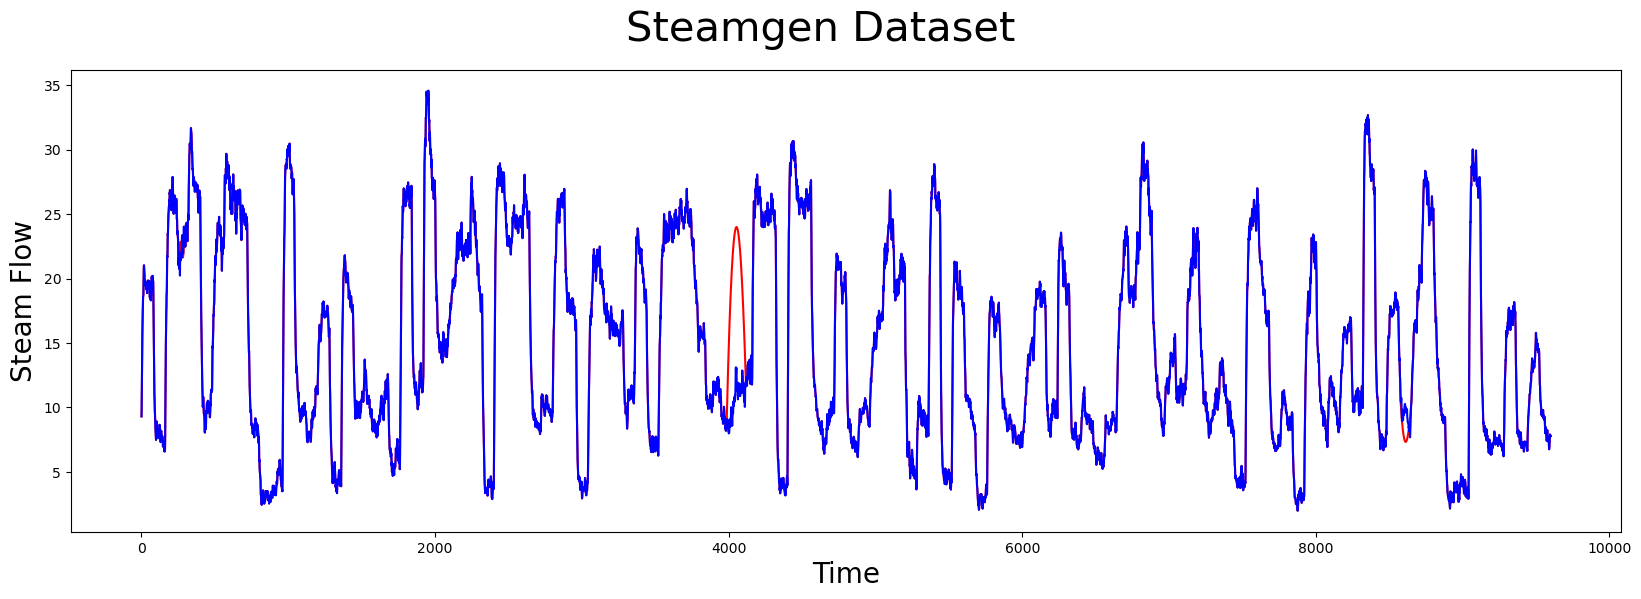

In [21]:
plt=reload(plt)
plt.suptitle('Steamgen Dataset', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('Steam Flow', fontsize='20')
plt.plot(steam_df2['steam flow'].interpolate(method='polynomial', order=3),'r')
plt.plot(steam_df['steam flow'].values,'b')
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error
from math import sqrt
stm2=steam_df2['steam flow'].interpolate(method='polynomial', order=3)

#calculate RMSE
sqrt(mean_squared_error(steam_df['steam flow'][3987:4116].values,stm2[3987:4116].values, squared=True)/100)
#from sklearn.metrics import mean_squared_error
#rmse = mean_squared_error(steam_df['steam flow'][3987:4116].values, steam_df2['steam flow'][3987:4116].values , squared=False)
#print(rmse)

0.97142652886733

In [23]:
from sklearn.metrics import mean_absolute_error as mae
  

error = mae(steam_df['steam flow'][3987:4116].values,stm2[3987:4116].values)
  
# display
print("Mean absolute error : " + str(error))

Mean absolute error : 9.051352429040458


In [24]:
tau, p_value=(scipy.stats.kendalltau(steam_df['steam flow'][3987:4116].values,stm2[3987:4116].values)
  )
print(tau,p_value)

0.36797480620155043 6.206545528429324e-10


In [25]:
m=400
mp = stumpy.stump(steam_df['steam flow'][0:3950], m,steam_df2['steam flow'][4117:4517],ignore_trivial = False)

In [26]:
motif_idx = np.argsort(mp[:,0])[0:5]

print(mp[motif_idx[0:5],0])
#motif_idx
#motif_idx2
#p
print(f"The motif is located at index {motif_idx}")
motif_idx = np.argsort(mp[:, 0])[0]
discord_idx=motif_idx
print(f"The motif is located at index {motif_idx}")

[7.961055370771097 8.005130369392278 8.008179331930924 8.13231964727981
 8.142086589104341]
The motif is located at index [2759 2758 2760 2761 2757]
The motif is located at index 2759


Text(0.5, 0, 'Time')

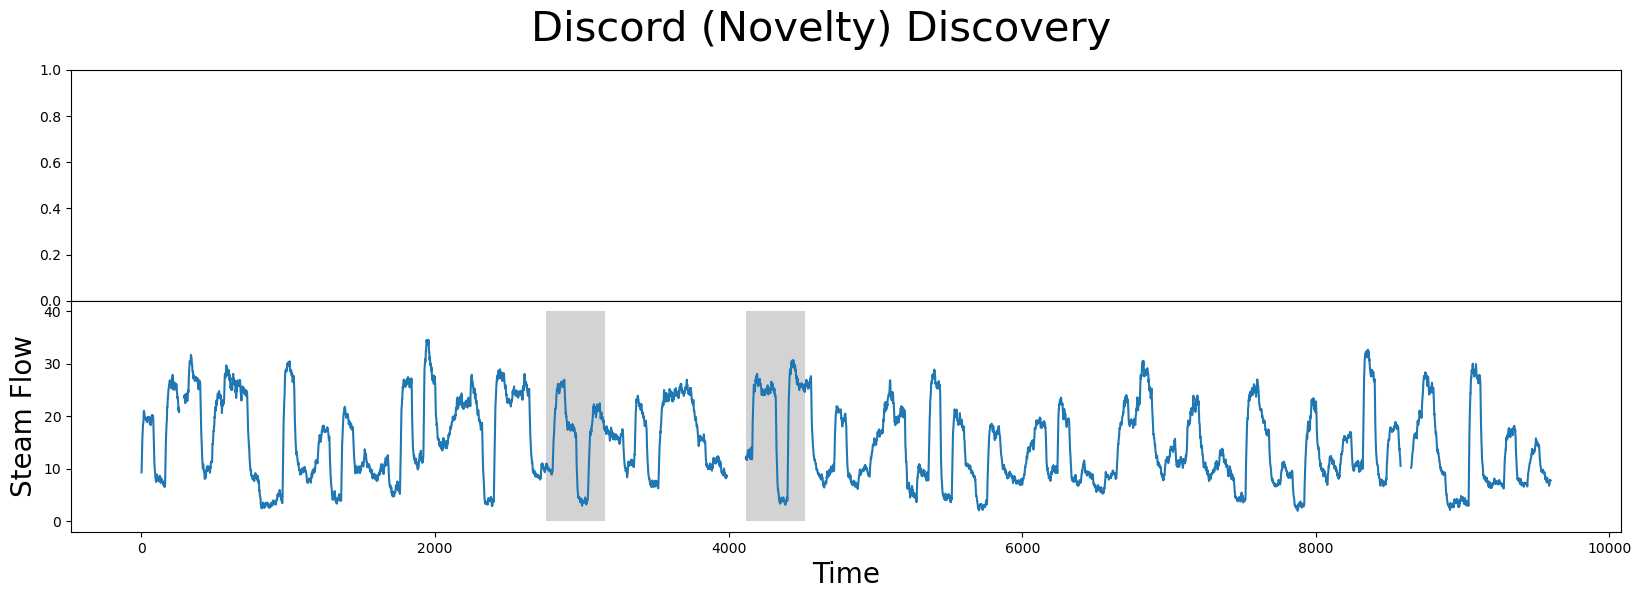

In [27]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Discord (Novelty) Discovery', fontsize='30')
rect = Rectangle((2759, 0), m, 40, facecolor='lightgrey')
axs[1].add_patch(rect)
axs[1].plot(steam_df2['steam flow'].values)
axs[1].set_ylabel('Steam Flow', fontsize='20')
rect = Rectangle((4117, 0), m, 40, facecolor='lightgrey')
axs[1].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')


In [28]:
m=200
#mp = stumpy.stump(steam_df['steam flow'][0:3950], m,steam_df2['steam flow'][3587:3987],ignore_trivial = False)

In [29]:
import scipy.stats

K=0
x=0
z=0
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=2)
    return v
for K in range(3500):
    
    tau, p_value=(scipy.stats.kendalltau(steam_df2['steam flow'][3786:3986],steam_df['steam flow'][K:K+200]))
    if tau>x:
        x=tau
        z=(K)
   
print(x,z)

0.7435175879396984 1388


Text(0.5, 0, 'Time')

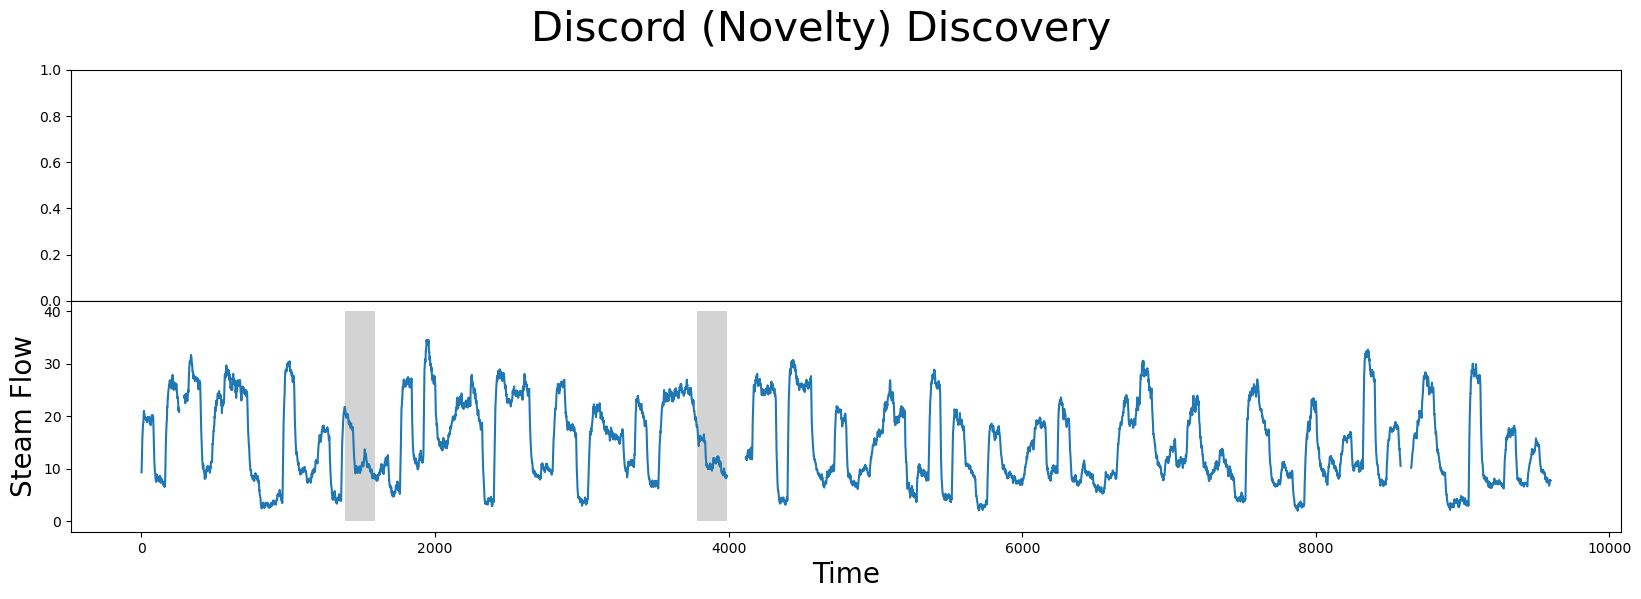

In [30]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Discord (Novelty) Discovery', fontsize='30')
rect = Rectangle((1388, 0), m, 40, facecolor='lightgrey')
axs[1].add_patch(rect)
axs[1].plot(steam_df2['steam flow'].values)
axs[1].set_ylabel('Steam Flow', fontsize='20')
rect = Rectangle((3786, 0), m, 40, facecolor='lightgrey')
axs[1].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')

Text(0.5, 0, 'Time')

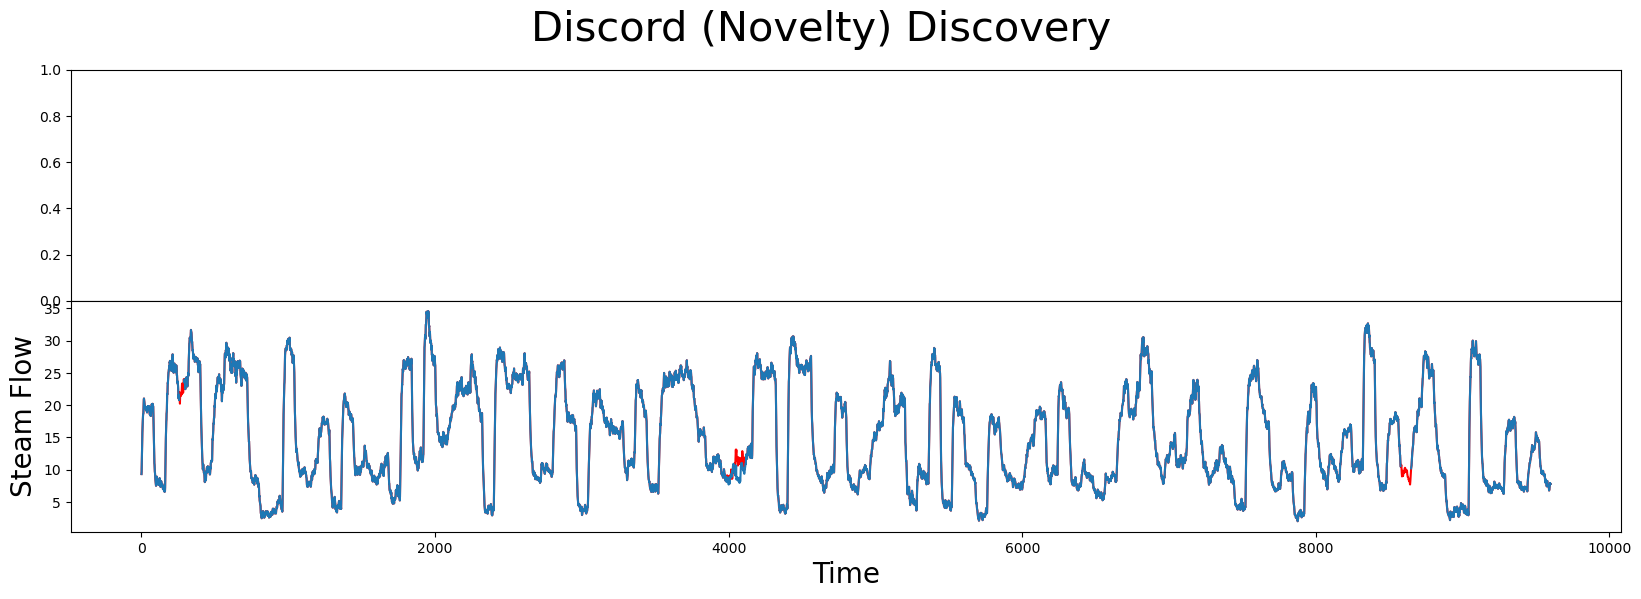

In [31]:
import scipy.stats

K=0
x=0
d=0
z=0
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=2)
    return v
for K in range(66):
    
    x=(steam_df2['steam flow'][1588+K:1589+K].values)#-steam_df2['steam flow'][1587+K:1588+K].values)
    d=(steam_df2['steam flow'][2758-K:2759-K].values)
    steam_df2['steam flow'][3986+K:3987+K]=x
    steam_df2['steam flow'][4117-K:4118-K]=d
    
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Discord (Novelty) Discovery', fontsize='30')
axs[1].plot(steam_df['steam flow'].values,'r')

axs[1].plot(steam_df2['steam flow'].values)
axs[1].set_ylabel('Steam Flow', fontsize='20')

axs[1].set_xlabel('Time', fontsize ='20')

In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
sqrt(mean_squared_error(steam_df['steam flow'][3987:4116].values, steam_df2['steam flow'][3987:4116].values, squared=True)/100)
#from sklearn.metrics import mean_squared_error
#rmse = mean_squared_error(steam_df['steam flow'][3987:4116].values, steam_df2['steam flow'][3987:4116].values , squared=False)
#print(rmse)

0.17854868273419058

In [33]:
from sklearn.metrics import mean_absolute_error as mae
  

error = mae(steam_df['steam flow'][3987:4116].values, steam_df2['steam flow'][3987:4116].values)
  
# display
print("Mean absolute error : " + str(error))

Mean absolute error : 1.3685562922480623


In [34]:
tau, p_value=(scipy.stats.kendalltau(steam_df2['steam flow'][3987:4116],steam_df['steam flow'][3987:4116]))
print(tau,p_value)

0.2713178294573643 5.104703070775826e-06
